# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

import xgboost as xgb

# Import Data

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df['PassengerId'] = df['PassengerId'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# Feature Selection

In [4]:
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'

# Train Test Split

In [5]:
X = df[numerical_features + categorical_features]
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Outlier Removal

In [7]:
# only on the training set!!! But we won't use it on this dataset

# Missing Values Imputation

In [8]:
# fit on the training set, transform the training and test set
# if I use the mean of the training set for one variable, then this mean is applied on the test set

In [9]:
numerical_imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean for numerical columns

X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

In [10]:
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace NaN with mode for categorical columns

X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

In [11]:
X_train

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked
368,30.101874,0.0,0.0,7.7500,3,female,Q
236,44.000000,1.0,0.0,26.0000,2,male,S
812,35.000000,0.0,0.0,10.5000,2,male,S
695,52.000000,0.0,0.0,13.5000,2,male,S
69,26.000000,2.0,0.0,8.6625,3,male,S
...,...,...,...,...,...,...,...
247,24.000000,0.0,2.0,14.5000,2,female,S
166,30.101874,0.0,1.0,55.0000,1,female,S
75,25.000000,0.0,0.0,7.6500,3,male,S
644,0.750000,2.0,1.0,19.2583,3,female,C


# One-Hot Encoding

In [12]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [13]:
X_train_encoded = enc.fit_transform(X_train[categorical_features])
X_test_encoded = enc.transform(X_test[categorical_features])

In [14]:
encoded_columns = enc.get_feature_names_out(categorical_features)

encoded_columns

array(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [15]:
one_hot_features_train = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
one_hot_features_test = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

In [16]:
X_train = pd.concat([X_train, one_hot_features_train], axis=1)
X_test = pd.concat([X_test, one_hot_features_test], axis=1)

In [17]:
X_train

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
368,30.101874,0.0,0.0,7.7500,3,female,Q,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
236,44.000000,1.0,0.0,26.0000,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
812,35.000000,0.0,0.0,10.5000,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
695,52.000000,0.0,0.0,13.5000,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
69,26.000000,2.0,0.0,8.6625,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,24.000000,0.0,2.0,14.5000,2,female,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,30.101874,0.0,1.0,55.0000,1,female,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
75,25.000000,0.0,0.0,7.6500,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
644,0.750000,2.0,1.0,19.2583,3,female,C,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [18]:
X_test

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
830,15.000000,1.0,0.0,14.4542,3,female,C,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
548,33.000000,1.0,1.0,20.5250,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
686,14.000000,4.0,1.0,39.6875,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
534,30.000000,0.0,0.0,8.6625,3,female,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
17,30.101874,0.0,0.0,13.0000,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,33.000000,0.0,0.0,7.8958,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
167,45.000000,1.0,4.0,27.9000,3,female,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
530,2.000000,1.0,1.0,26.0000,2,female,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
490,30.101874,1.0,0.0,19.9667,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Dataset Balance

In [19]:
# only on the training set, we should never balance the test set!!! in this dataset we won't balance

# Feature Scaling

In [20]:
# fit on the training set, transform the training and test set
# the same scaler that was trained in the training set should be use to scale the training and test set

In [21]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])  # Fit on the training data
X_test[numerical_features] = scaler.transform(X_test[numerical_features])  # Only transform the test data

In [22]:
X_train

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
368,-2.709512e-16,-0.472178,-0.458443,-0.483875,3,female,Q,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
236,1.059954e+00,0.446376,-0.458443,-0.130187,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
812,3.735605e-01,-0.472178,-0.458443,-0.430580,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
695,1.670082e+00,-0.472178,-0.458443,-0.372439,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
69,-3.128335e-01,1.364931,-0.458443,-0.466191,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-4.653655e-01,-0.472178,2.091645,-0.353059,2,female,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,-2.709512e-16,-0.472178,0.816601,0.431839,1,female,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
75,-3.890995e-01,-0.472178,-0.458443,-0.485813,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
644,-2.238550e+00,1.364931,0.816601,-0.260842,3,female,C,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [23]:
X_test

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
830,-1.151759e+00,0.446376,-0.458443,-0.353947,3,female,C,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
548,2.210285e-01,0.446376,0.816601,-0.236293,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
686,-1.228025e+00,3.202040,0.816601,0.135080,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
534,-7.769515e-03,-0.472178,-0.458443,-0.466191,3,female,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
17,-2.709512e-16,-0.472178,-0.458443,-0.382129,2,male,S,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,2.210285e-01,-0.472178,-0.458443,-0.481050,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
167,1.136220e+00,0.446376,4.641734,-0.093364,3,female,S,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
530,-2.143217e+00,0.446376,0.816601,-0.130187,2,female,S,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
490,-2.709512e-16,0.446376,-0.458443,-0.247113,3,male,S,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [24]:
# Dropping the categorical variabels because they are one hot encoded
X_train = X_train.drop(columns = categorical_features)
X_test = X_test.drop(columns = categorical_features)

In [25]:
X_train

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
368,-2.709512e-16,-0.472178,-0.458443,-0.483875,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
236,1.059954e+00,0.446376,-0.458443,-0.130187,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
812,3.735605e-01,-0.472178,-0.458443,-0.430580,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
695,1.670082e+00,-0.472178,-0.458443,-0.372439,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
69,-3.128335e-01,1.364931,-0.458443,-0.466191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,-4.653655e-01,-0.472178,2.091645,-0.353059,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
166,-2.709512e-16,-0.472178,0.816601,0.431839,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
75,-3.890995e-01,-0.472178,-0.458443,-0.485813,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
644,-2.238550e+00,1.364931,0.816601,-0.260842,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [26]:
X_test

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
830,-1.151759e+00,0.446376,-0.458443,-0.353947,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
548,2.210285e-01,0.446376,0.816601,-0.236293,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
686,-1.228025e+00,3.202040,0.816601,0.135080,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
534,-7.769515e-03,-0.472178,-0.458443,-0.466191,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
17,-2.709512e-16,-0.472178,-0.458443,-0.382129,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,2.210285e-01,-0.472178,-0.458443,-0.481050,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
167,1.136220e+00,0.446376,4.641734,-0.093364,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
530,-2.143217e+00,0.446376,0.816601,-0.130187,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
490,-2.709512e-16,0.446376,-0.458443,-0.247113,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Modeling Functions

In [27]:
def show_results(y_pred):    
    # 1. Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # 2. Classification Report (Precision, Recall, F1-Score, Support)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 3. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualize Confusion Matrix using Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # 4. Precision, Recall, F1-Score (Bar Chart)
    # Extract precision, recall, and F1 scores from classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics = report['1']  # Or you can use 'macro avg' or other types
    
    # Plot Precision, Recall, F1-Score
    metrics_data = {
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score']
    }
    
    # Create bar chart for the metrics
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(metrics_data.keys()), y=list(metrics_data.values()))
    plt.title("Precision, Recall, F1-Score")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Limit y-axis to 0-1
    plt.show()

In [28]:
report_ac = {}

# Modeling Parametrizations

In [29]:
metric_to_optimize = 'f1'

# Naive Bayes

In [30]:
nb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # smoothing values to avoid division by zero
}

grid_search_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid,
    cv=5,
    scoring=metric_to_optimize,
    n_jobs=-1,
    verbose=1
)

grid_search_nb.fit(X_train, y_train)

nb_model = grid_search_nb.best_estimator_

y_pred_nb = nb_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [31]:
accuracy = accuracy_score(y_test, y_pred_nb)
report = classification_report(y_test, y_pred_nb, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Naive Bayes'] = report

{'precision': 0.7123287671232876, 'recall': 0.7647058823529411, 'f1-score': 0.7375886524822695, 'support': 68.0, 'accuracy': 0.7932960893854749}


Accuracy: 0.7933

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       111
           1       0.71      0.76      0.74        68

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179



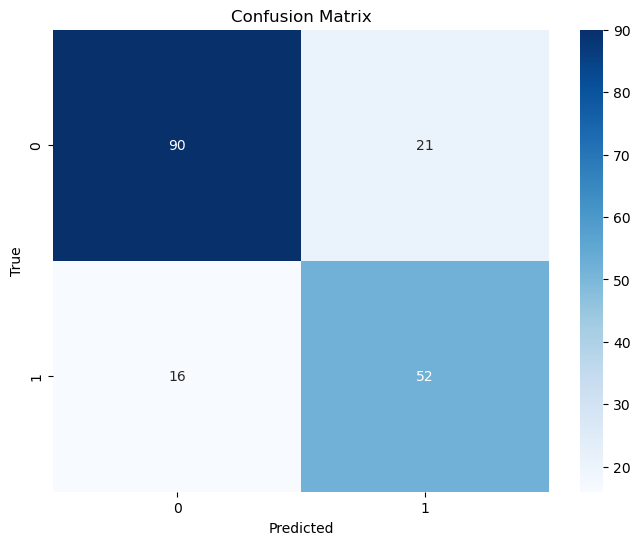

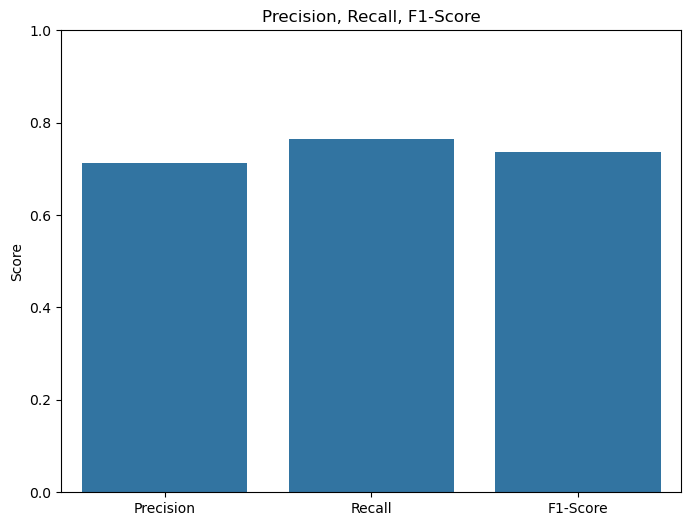

In [32]:
show_results(y_pred_nb)

# Logistic Regression

In [33]:
logreg_model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],            # Inverse of regularization strength
    'penalty': ['l2'],                       # L2 regularization (common with 'lbfgs')
    'solver': ['lbfgs'],                     # Solver that supports L2
}

grid_search_logreg = GridSearchCV(
    estimator=logreg_model,
    param_grid=param_grid,
    cv=5,
    scoring=metric_to_optimize,
    n_jobs=-1,
    verbose=1
)

grid_search_logreg.fit(X_train, y_train)
logreg_model = grid_search_logreg.best_estimator_

y_pred_logreg = logreg_model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [34]:
accuracy = accuracy_score(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Logistic Regression'] = report

{'precision': 0.746268656716418, 'recall': 0.7352941176470589, 'f1-score': 0.7407407407407407, 'support': 68.0, 'accuracy': 0.8044692737430168}


Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       111
           1       0.75      0.74      0.74        68

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



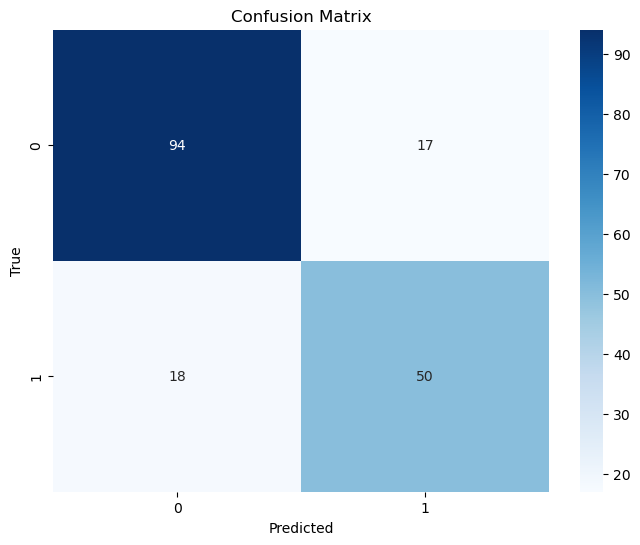

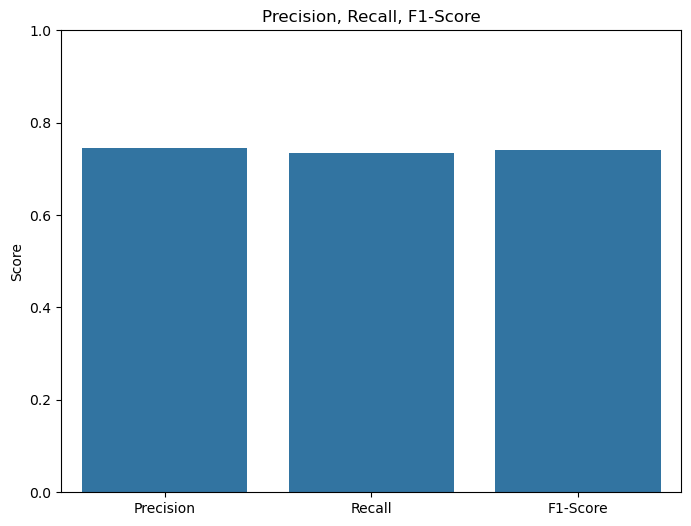

In [35]:
show_results(y_pred_logreg)

# Decision Tree

In [36]:
dt_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,                
    scoring=metric_to_optimize,  
    n_jobs=-1,           
    verbose=1
)

grid_search.fit(X_train, y_train)
dt_model = grid_search.best_estimator_

y_pred_dt = dt_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [37]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Decision Tree'] = report

{'precision': 0.8541666666666666, 'recall': 0.6029411764705882, 'f1-score': 0.7068965517241379, 'support': 68.0, 'accuracy': 0.8100558659217877}


Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       111
           1       0.85      0.60      0.71        68

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.82      0.81      0.80       179



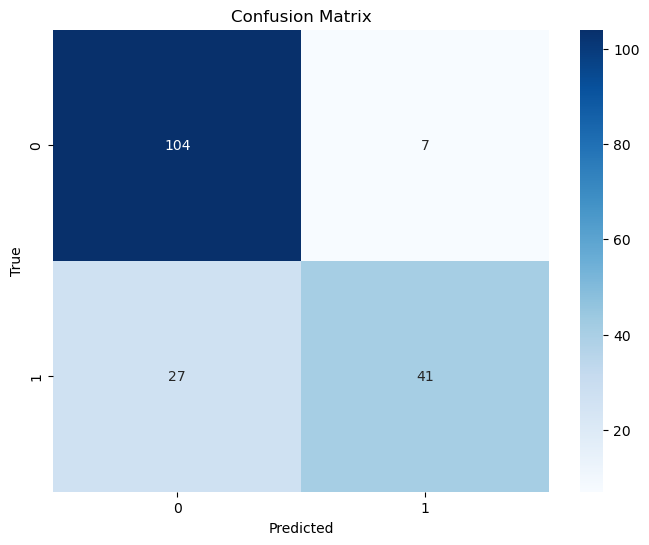

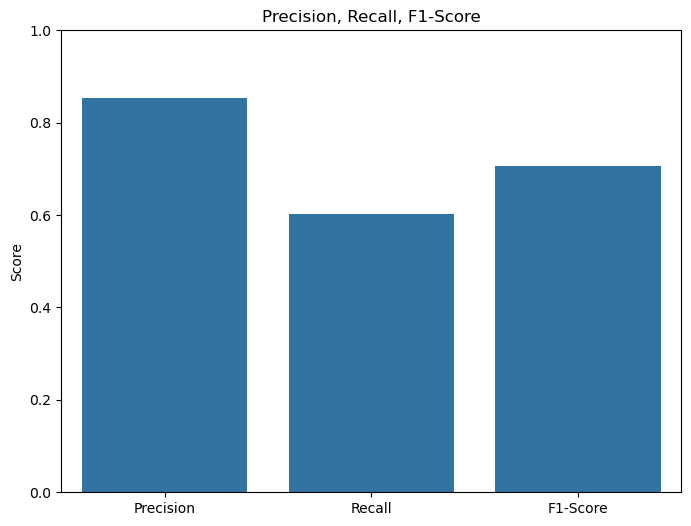

In [38]:
show_results(y_pred_dt)

# Random Forest

In [39]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],               # Number of trees
    'max_depth': [None, 10, 20],              # Max depth of the tree
    'min_samples_split': [2, 5],              # Min samples to split an internal node
    'min_samples_leaf': [1, 2],               # Min samples at a leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider at each split
}

grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring=metric_to_optimize,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

rf_model = grid_search_rf.best_estimator_

y_pred_rf = rf_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [40]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['Random Forest'] = report

{'precision': 0.8125, 'recall': 0.7647058823529411, 'f1-score': 0.7878787878787878, 'support': 68.0, 'accuracy': 0.8435754189944135}


Accuracy: 0.8436

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       111
           1       0.81      0.76      0.79        68

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



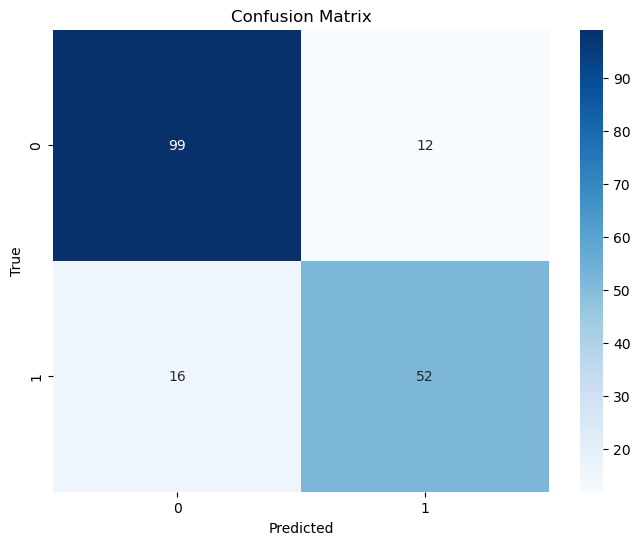

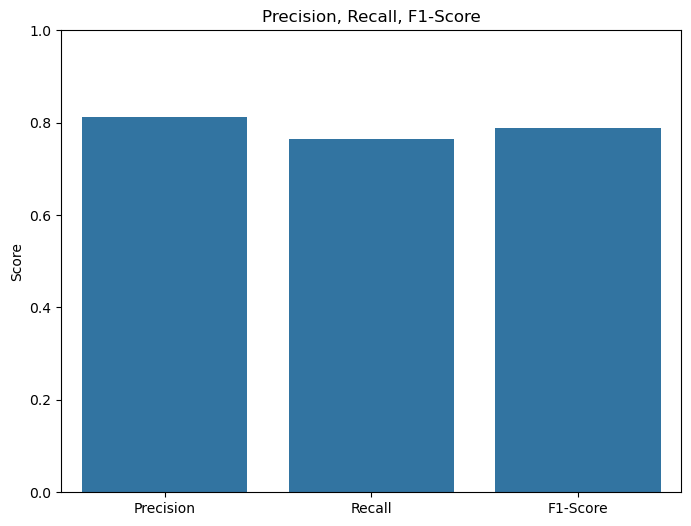

In [41]:
show_results(y_pred_rf)

# XGBoost

In [42]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring=metric_to_optimize,
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train, y_train)

xgb_model = grid_search_xgb.best_estimator_

y_pred_xgb = xgb_model.predict(X_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [43]:
accuracy = accuracy_score(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

report_ac['XGBoost'] = report

{'precision': 0.7903225806451613, 'recall': 0.7205882352941176, 'f1-score': 0.7538461538461538, 'support': 68.0, 'accuracy': 0.8212290502793296}


Accuracy: 0.8212

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.79      0.72      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



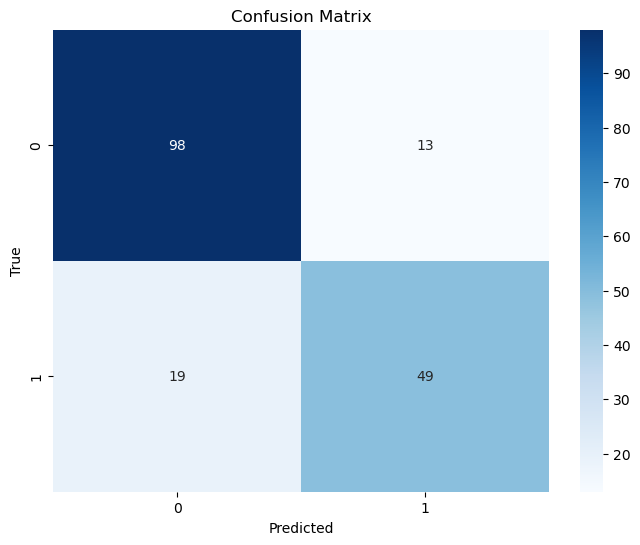

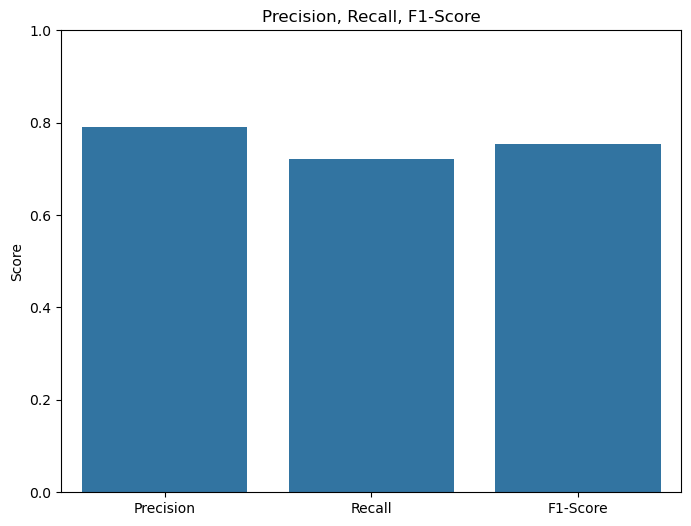

In [44]:
show_results(y_pred_xgb)

# Model Evaluation

In [45]:
report_ac

{'Naive Bayes': {'precision': 0.7123287671232876,
  'recall': 0.7647058823529411,
  'f1-score': 0.7375886524822695,
  'support': 68.0,
  'accuracy': 0.7932960893854749},
 'Logistic Regression': {'precision': 0.746268656716418,
  'recall': 0.7352941176470589,
  'f1-score': 0.7407407407407407,
  'support': 68.0,
  'accuracy': 0.8044692737430168},
 'Decision Tree': {'precision': 0.8541666666666666,
  'recall': 0.6029411764705882,
  'f1-score': 0.7068965517241379,
  'support': 68.0,
  'accuracy': 0.8100558659217877},
 'Random Forest': {'precision': 0.8125,
  'recall': 0.7647058823529411,
  'f1-score': 0.7878787878787878,
  'support': 68.0,
  'accuracy': 0.8435754189944135},
 'XGBoost': {'precision': 0.7903225806451613,
  'recall': 0.7205882352941176,
  'f1-score': 0.7538461538461538,
  'support': 68.0,
  'accuracy': 0.8212290502793296}}

# Running against the real test

In [46]:
# best model
rf_model

df = pd.read_csv('tested.csv')

df['PassengerId'] = df['PassengerId'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'

X = df[numerical_features + categorical_features].copy()
y = df[target].copy()

X[numerical_features] = numerical_imputer.transform(X[numerical_features])
X[categorical_features] = categorical_imputer.transform(X[categorical_features])

X_encoded = enc.transform(X[categorical_features])

encoded_columns = enc.get_feature_names_out(categorical_features)

one_hot_features = pd.DataFrame(X_encoded, columns=encoded_columns, index=X.index)
X = pd.concat([X, one_hot_features], axis=1)

X[numerical_features] = scaler.transform(X[numerical_features])

X = X.drop(columns = categorical_features)

In [47]:
y_pred_rf_test = rf_model.predict(X)

In [49]:
accuracy = accuracy_score(y, y_pred_rf_test)
report = classification_report(y, y_pred_rf_test, output_dict=True)['1']
report['accuracy'] = accuracy
print(report)

{'precision': 0.8266666666666667, 'recall': 0.8157894736842105, 'f1-score': 0.8211920529801324, 'support': 152.0, 'accuracy': 0.8708133971291866}


<Axes: >

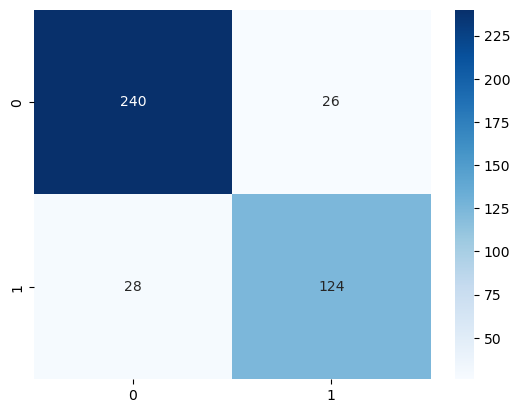

In [50]:
class_names = y.unique()
cm = confusion_matrix(y, y_pred_rf_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')